In [3]:
import folium
import pandas as pd
import numpy as np

chicago_map = folium.Map(location=[41.778876, -87.699754], zoom_start=12)
Chicago_map_2 = folium.Map(location=[41.778876, -87.699754], zoom_start=12) #41.881268, -87.683904

In [4]:
scooter = pd.read_csv('../data/clean_scooter.csv')

In [4]:
chicago_map

In [5]:
start_locations = scooter[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
start_location_list = start_locations.values.tolist()
len(start_location_list)
start_location_list[7]

[41.9227598585219, -87.6991559457654]

In [6]:
for point in range(0, len(start_location_list)):
    folium.Marker(start_location_list[point], popup='Start Location').add_to(chicago_map)


In [8]:
for index, row in scooter.iterrows():
        folium.CircleMarker(location=(row['Start_Centroid_Latitude'], row['Start_Centroid_Longitude']),
                                    radius=.75,
                                    color='m',
                                    popup=str(row['Start_Community_Area_Name']),
                                    fill=True).add_to(Chicago_map_2)

In [9]:
chicago_map

In [11]:
Chicago_map_2

In [1]:
import folium as f 
import pandas as pd 
import numpy as np
import geopandas as g
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [18]:
scooter = pd.read_csv('../data/clean_scooter.csv')
gdf = g.GeoDataFrame(scooter, 
geometry=g.points_from_xy(scooter.End_Centroid_Longitude, scooter.End_Centroid_Latitude))

chi_geo = g.read_file('../data/scooter_zone.shp')

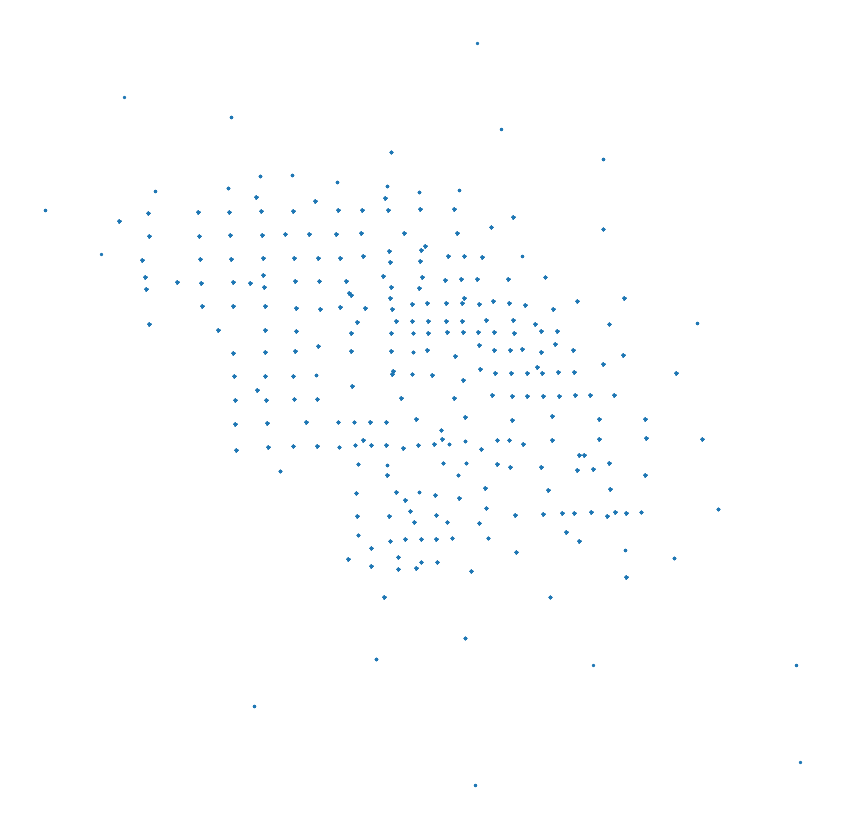

In [4]:
end_points_map = gdf.plot(figsize=(15,15), markersize=5) 
end_points_map.set_axis_off()
plt.show()

<ipython-input-6-0c92ae0e18a3>:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  chi_geo.apply(lambda x: chi_end_map.annotate(s=x.name, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1)


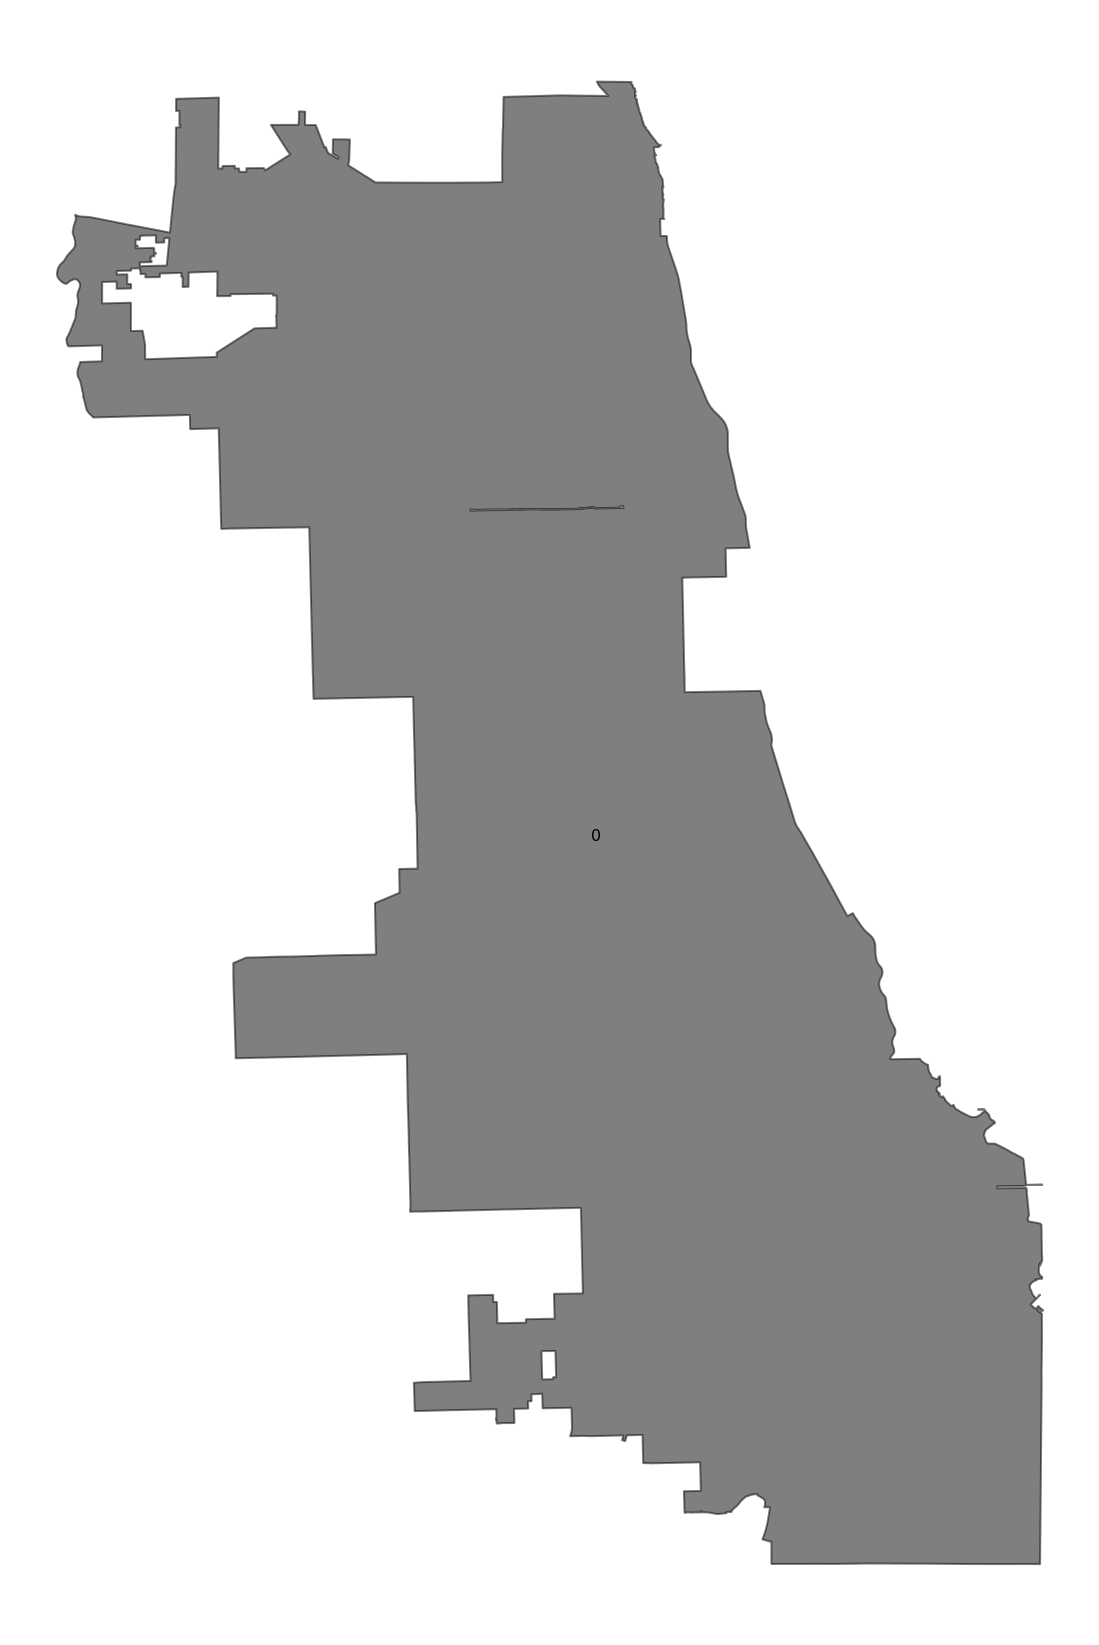

In [6]:
chi_end_map = chi_geo.plot(figsize=(30,30), edgecolor='k', cmap='nipy_spectral', alpha=0.5, linewidth=2) 
chi_geo.apply(lambda x: chi_end_map.annotate(s=x.name, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1)
chi_end_map.set_axis_off()
plt.show()

<ipython-input-7-a0a899df24a5>:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  chi_geo.apply(lambda x: chi_end_map.annotate(s=x.name, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1)


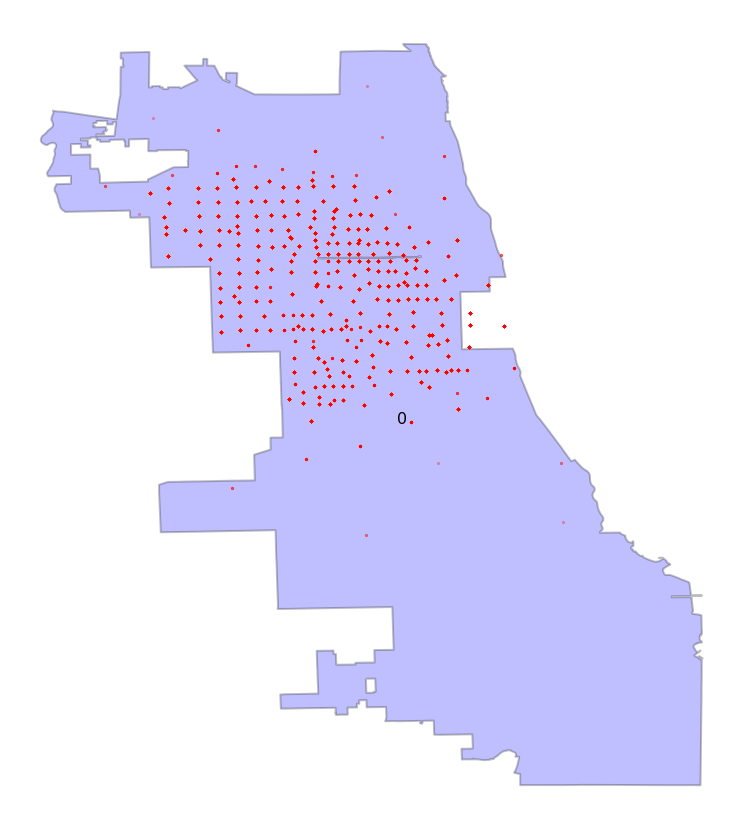

In [7]:
chi_end_map = chi_geo.plot(figsize=(15,15), edgecolor='k', facecolor='b', alpha=0.25, linewidth=2) 
chi_geo.apply(lambda x: chi_end_map.annotate(s=x.name, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1)
gdf.plot(figsize=(15,15), ax=chi_end_map, markersize=5, color='r', alpha=0.25) 
chi_end_map.set_axis_off()
plt.show()


In [8]:
scooter = pd.read_csv('../data/clean_scooter.csv')
gdf = g.GeoDataFrame(scooter, 
geometry=g.points_from_xy(scooter.End_Centroid_Longitude, scooter.End_Centroid_Latitude))

chi_geo = g.read_file('../data/geo_export_a2b2819f-5f66-495a-97ec-dc02810c8c6e.shp')


<ipython-input-12-315e8c01c6ad>:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  chi_geo.apply(lambda x: chi_end_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=8),axis=1)


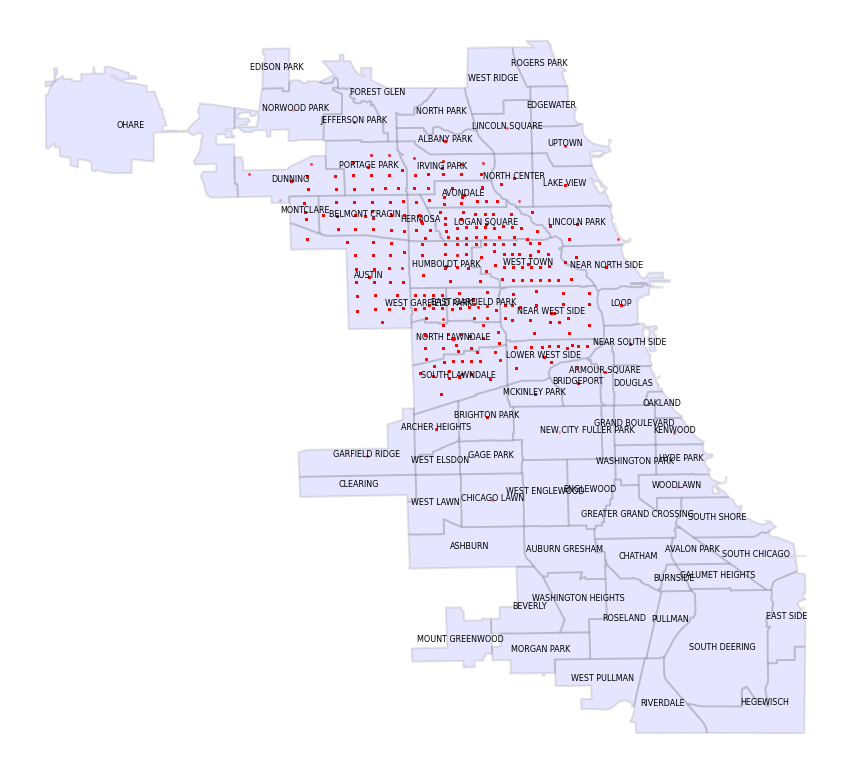

In [12]:
chi_end_map = chi_geo.plot(figsize=(15,15), edgecolor='k', facecolor='b', alpha=0.1, linewidth=2) 
chi_geo.apply(lambda x: chi_end_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=8),axis=1)
gdf.plot(figsize=(15,15), ax=chi_end_map, markersize=3.5, color='r', alpha=0.25) 
chi_end_map.set_axis_off()
plt.show()

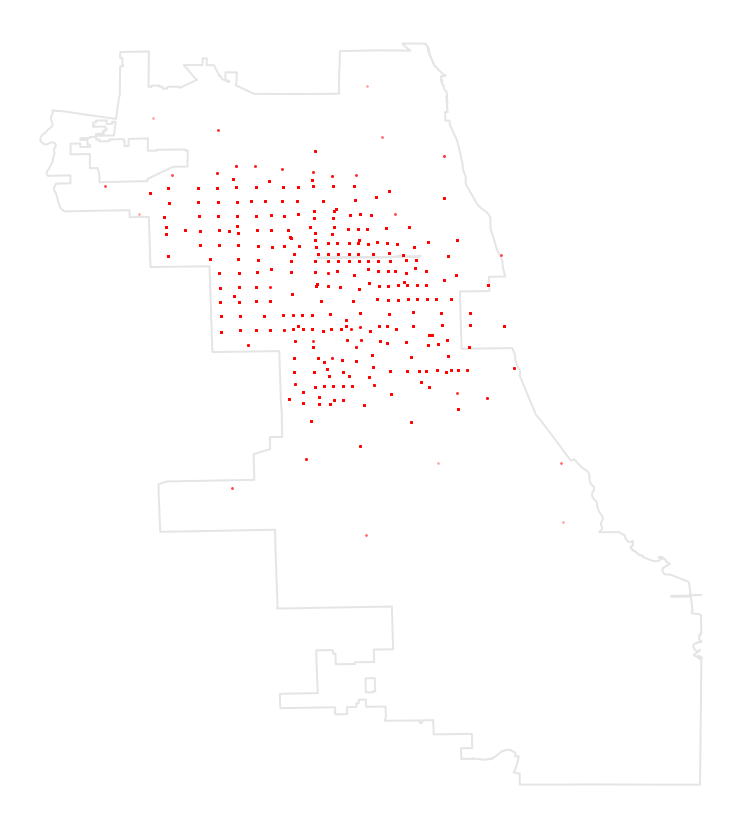

In [17]:
chi_end_map = chi_geo.plot(figsize=(15,15), edgecolor='k', facecolor='none', alpha=0.1, linewidth=2) 

gdf.plot(figsize=(15,15), ax=chi_end_map, markersize=3.5, color='r', alpha=0.25) 
chi_end_map.set_axis_off()
plt.show()

In [35]:
df = chi_geo.to_crs(epsg=3857)
# gdf1 = gdf.to_crs(epsg=3857)
import contextily as ctx

/Users/sambuck92/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


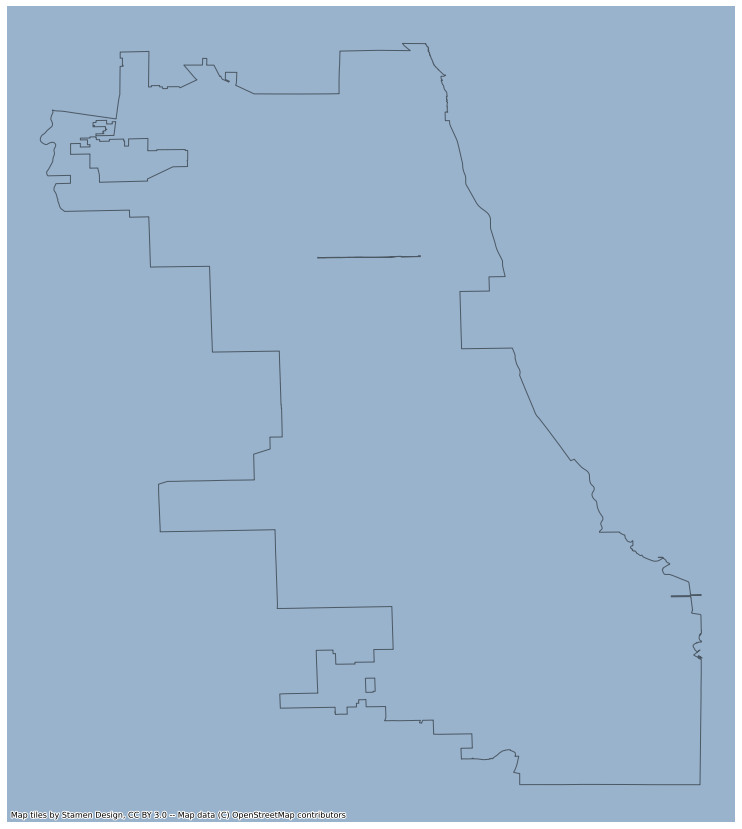

In [36]:
ax = chi_geo.plot(figsize=(15,15), alpha=0.5, edgecolor='k', facecolor='none')
ctx.add_basemap(ax)
# gdf.plot(figsize=(15,15), ax=ax, markersize=3.5, color='r', alpha=0.7) 
ax.set_axis_off()

In [18]:
import folium
chicago_map = folium.Map(location=[41.778876, -87.699754], zoom_start=12)

In [22]:
scooter_trips = folium.map.FeatureGroup()
end_latitudes = list(gdf.End_Centroid_Latitude)
end_longitudes = list(gdf.End_Centroid_Longitude)
start_latitudes = list(gdf.Start_Centroid_Latitude)
start_longitudes = list(gdf.Start_Centroid_Longitude)
labels = list(gdf.Trip_ID)


In [ ]:
for label in labels[:15]:
    for lat, lng in zip(end_latitudes[:15], end_longitudes[:15]):
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='red')
         ).add_to(chicago_map)
    for lat, lng in zip(start_latitudes[:15], start_longitudes[:15]):
        folium.Marker(
        location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='green')
         ).add_to(chicago_map)


In [20]:
chicago_map.add_child(scooter_trips)
chicago_map

KeyboardInterrupt: 